In [1]:
! pip install yfinance --upgrade --no-cache-dir

In [2]:
import yfinance as yf

In [3]:
codigo = ['PETR4.SA']
petro = yf.Ticker(codigo[0])

In [4]:
petro = petro.history(period='max')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

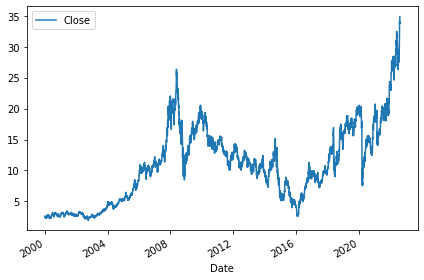

In [6]:
petro.plot.line(y='Close', use_index=True)
plt.tight_layout()

In [7]:
del petro['Dividends']
del petro['Stock Splits']

In [8]:
petro['tomorrow'] = petro.Close.shift(-1)

In [9]:
petro['target'] = (petro['tomorrow'] > petro['Close']).astype(int)

In [10]:
# variação percentual do preço de fechamento com 3 dias 
petro['Close_perc_3'] = ((petro['Close'] - petro['Close'].shift(3)) / petro['Close'].shift(3))
petro['Close_perc_3'].fillna(petro['Close_perc_3'].iloc[4],inplace=True)
# variação percentual com 5 dias 
petro['Close_perc_5'] = ((petro['Close'] - petro['Close'].shift(5)) / petro['Close'].shift(5))
petro['Close_perc_5'].fillna(petro['Close_perc_5'].iloc[6],inplace=True)
# variação percentual com 7 dias
petro['Close_perc_7'] = ((petro['Close'] - petro['Close'].shift(7)) / petro['Close'].shift(7))
petro['Close_perc_7'].fillna(petro['Close_perc_7'].iloc[7], inplace=True)
# variação percentual de 15 dias 
petro['Close_perc_15'] = (petro['Close'] - petro['Close'].shift(15)) / petro['Close'].shift(15)
petro['Close_perc_15'].fillna(petro['Close_perc_15'].iloc[16], inplace=True)

In [11]:
train = petro.iloc[:-300]
test = petro.iloc[-300:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low', 'Close_perc_3', 'Close_perc_5', 'Close_perc_7', 
              'Close_perc_15']

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [400, 500, 600], 'min_samples_split': [100, 200, 300]}
]

forest_class = RandomForestClassifier()

grid_search = GridSearchCV(forest_class, param_grid, cv=tscv,
                           scoring='precision')

grid_search.fit(train[predictors], train['target'])

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [14]:
model = RandomForestClassifier(n_estimators=100, min_samples_split = 300,max_depth=400 ,random_state=True)

In [15]:
model.fit(train[predictors], train['target'])

RandomForestClassifier(max_depth=400, min_samples_split=300, random_state=True)

In [16]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [17]:
preds = preds.ravel()
preds = pd.Series(preds, index=test.index)
preds

Date
2021-05-26    1
2021-05-27    1
2021-05-28    1
2021-05-31    1
2021-06-01    0
             ..
2022-08-01    0
2022-08-02    0
2022-08-03    0
2022-08-04    0
2022-08-05    0
Length: 300, dtype: int32

In [18]:
precision_score(test['target'], preds)

0.5964912280701754

In [19]:
from sklearn.metrics import recall_score
recall_score(test['target'], preds)

0.2111801242236025